<a href="https://colab.research.google.com/github/chumphetx/EDA_WINES/blob/main/EDAWINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# eda-wine-review

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# get the dataset
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
# check about datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


Here we see a range of points given to a bottle of wine. The minimum is 80 and the max is 100.

After a quick google this seems to be a reasonable scale. Using the link here  https://www.wine-searcher.com/critics-17-wine+enthusiast you can see the wine enthusiast rates as below:

98–100 – Classic
94–97 – Superb
90–93 – Excellent
87–89 – Very good
83–86 – Good
80–82 – Acceptable

In [ ]:
# check the number of reviews per country
df["country"].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [ ]:
df["variety"].value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64

In [ ]:
sum(df.duplicated())

0

In [ ]:
df1 = df.copy()

In [ ]:
df1.columns



Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [ ]:
# drop the missing columns
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

KeyError: ignored

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [ ]:
# proportion of price non null
print("{:.0%}".format(df1["price"].count() / df.shape[0]))

93%


In [ ]:
# drop only the rows with missing values
df1 = df1.dropna(subset=["country", "price", "variety"])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


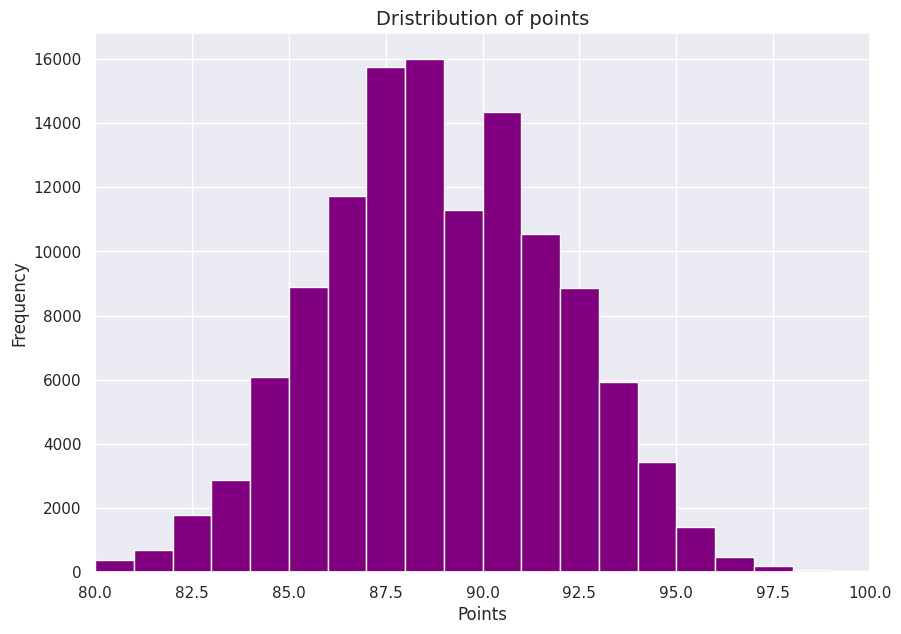

In [ ]:
# check the distribution of points
plt.figure(figsize=(10, 7))
plt.hist(data=df1, x='points', bins=np.arange (80, df1['points'].max()+1, 1), color = 'purple')
plt.xlim(80,100)
plt.title('Dristribution of points', fontsize=14)
plt.xlabel('Points')
plt.ylabel('Frequency');

In [ ]:
# top 10 wine producing
country_top_10 = df1["country"].value_counts()[:10]
country_top_10

US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: country, dtype: int64

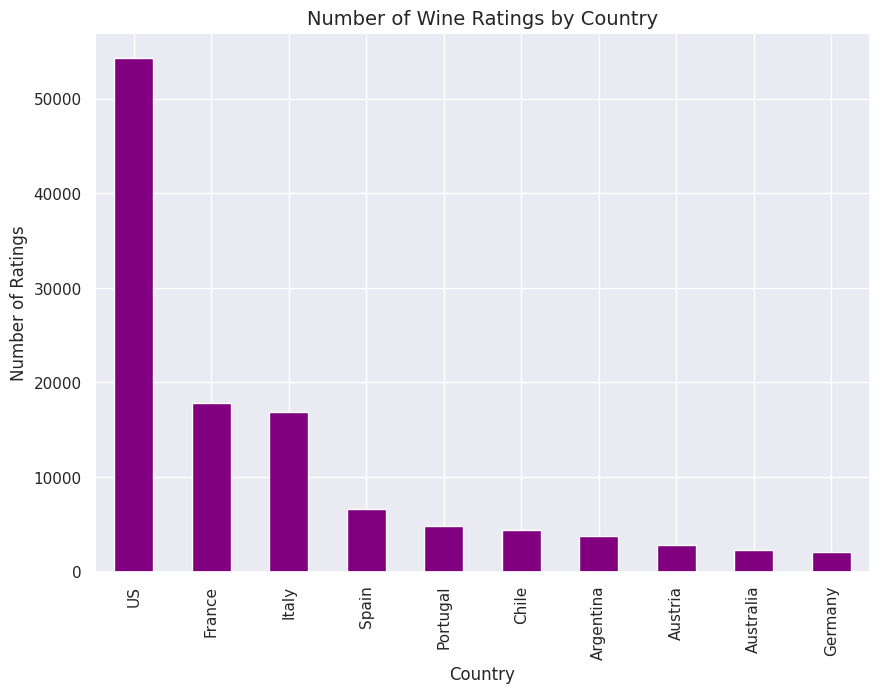

In [ ]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar', color = 'purple')
plt.title('Number of Wine Ratings by Country', fontsize = 14)
plt.xlabel('Country')
plt.ylabel('Number of Ratings');

In [ ]:
# top 10 countries with most average points
best_quality = df1.groupby("country").agg("mean")
best_quality = best_quality.sort_values(by="points", ascending=False)[:10]
best_quality.style.background_gradient(cmap='Purples',high=0.5, subset=["points"])

<ipython-input-40-74cd1640900f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_quality = df1.groupby("country").agg("mean")


,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598
Hungary,89.165517,40.648276
China,89.000000,18.000000
France,88.734867,41.139120
Luxembourg,88.666667,23.333333


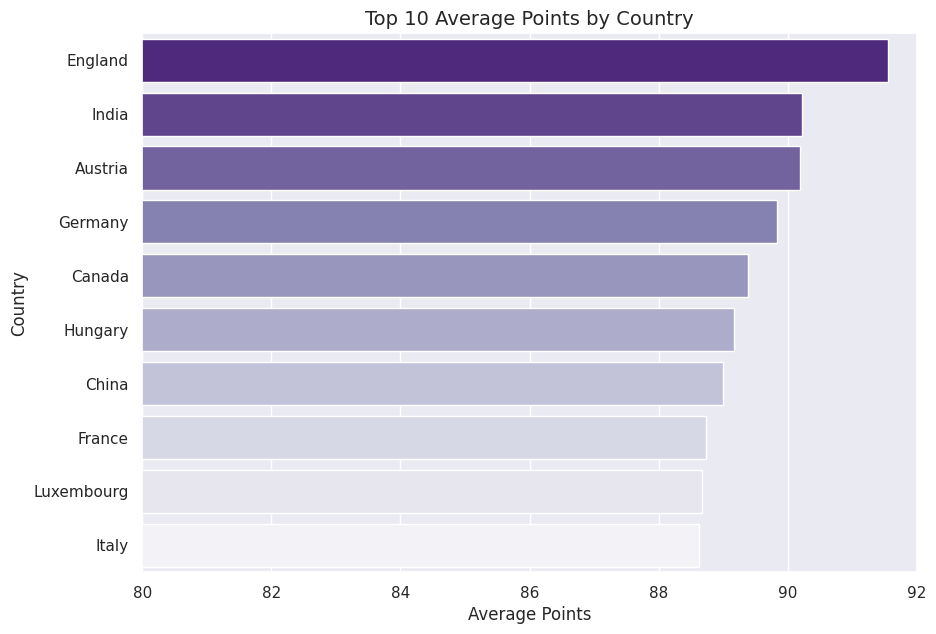

In [ ]:
y = best_quality.index.to_series()
x = best_quality["points"]

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Top 10 Average Points by Country', fontsize = 14)
plt.xlabel('Average Points')
plt.ylabel('Country');

In [ ]:
df1["points"].describe()

count    120915.000000
mean         88.421726
std           3.044954
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [ ]:
high_scores = df1.drop(["description", "price", "province", "winery"], axis=1)
high_scores = high_scores[high_scores["points"] >= 95][:20]
high_scores.style.background_gradient(cmap='Purples',high=0.5, subset=["points"])

,country,points,title,variety
345,Australia,100,Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen),Muscat
346,Australia,98,Chambers Rosewood Vineyards NV Rare Muscadelle (Rutherglen),Muscadelle
347,Germany,97,Robert Weil 2014 Kiedrich Gräfenberg Trockenbeerenauslese Riesling (Rheingau),Riesling
348,Australia,97,Chambers Rosewood Vineyards NV Grand Muscat (Rutherglen),Muscat
349,Australia,97,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier
350,Italy,97,Cavallotto 2010 Vignolo Riserva (Barolo),Nebbiolo
351,Hungary,96,Oremus 2005 Eszencia (Tokaji),Furmint
352,US,96,Rochioli 2014 South River Chardonnay (Russian River Valley),Chardonnay
353,France,96,Louis Latour 2014 Le Montrachet (Montrachet),Chardonnay
354,Germany,96,Robert Weil 2014 Kiedrich Gräfenberg Beerenauslese Riesling (Rheingau),Riesling


In [ ]:
high_scores["country"].value_counts()

Australia    6
US           4
France       4
Germany      3
Italy        2
Hungary      1
Name: country, dtype: int64

In [ ]:
# number of wines from each country
df1["country"].value_counts()

US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4415
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

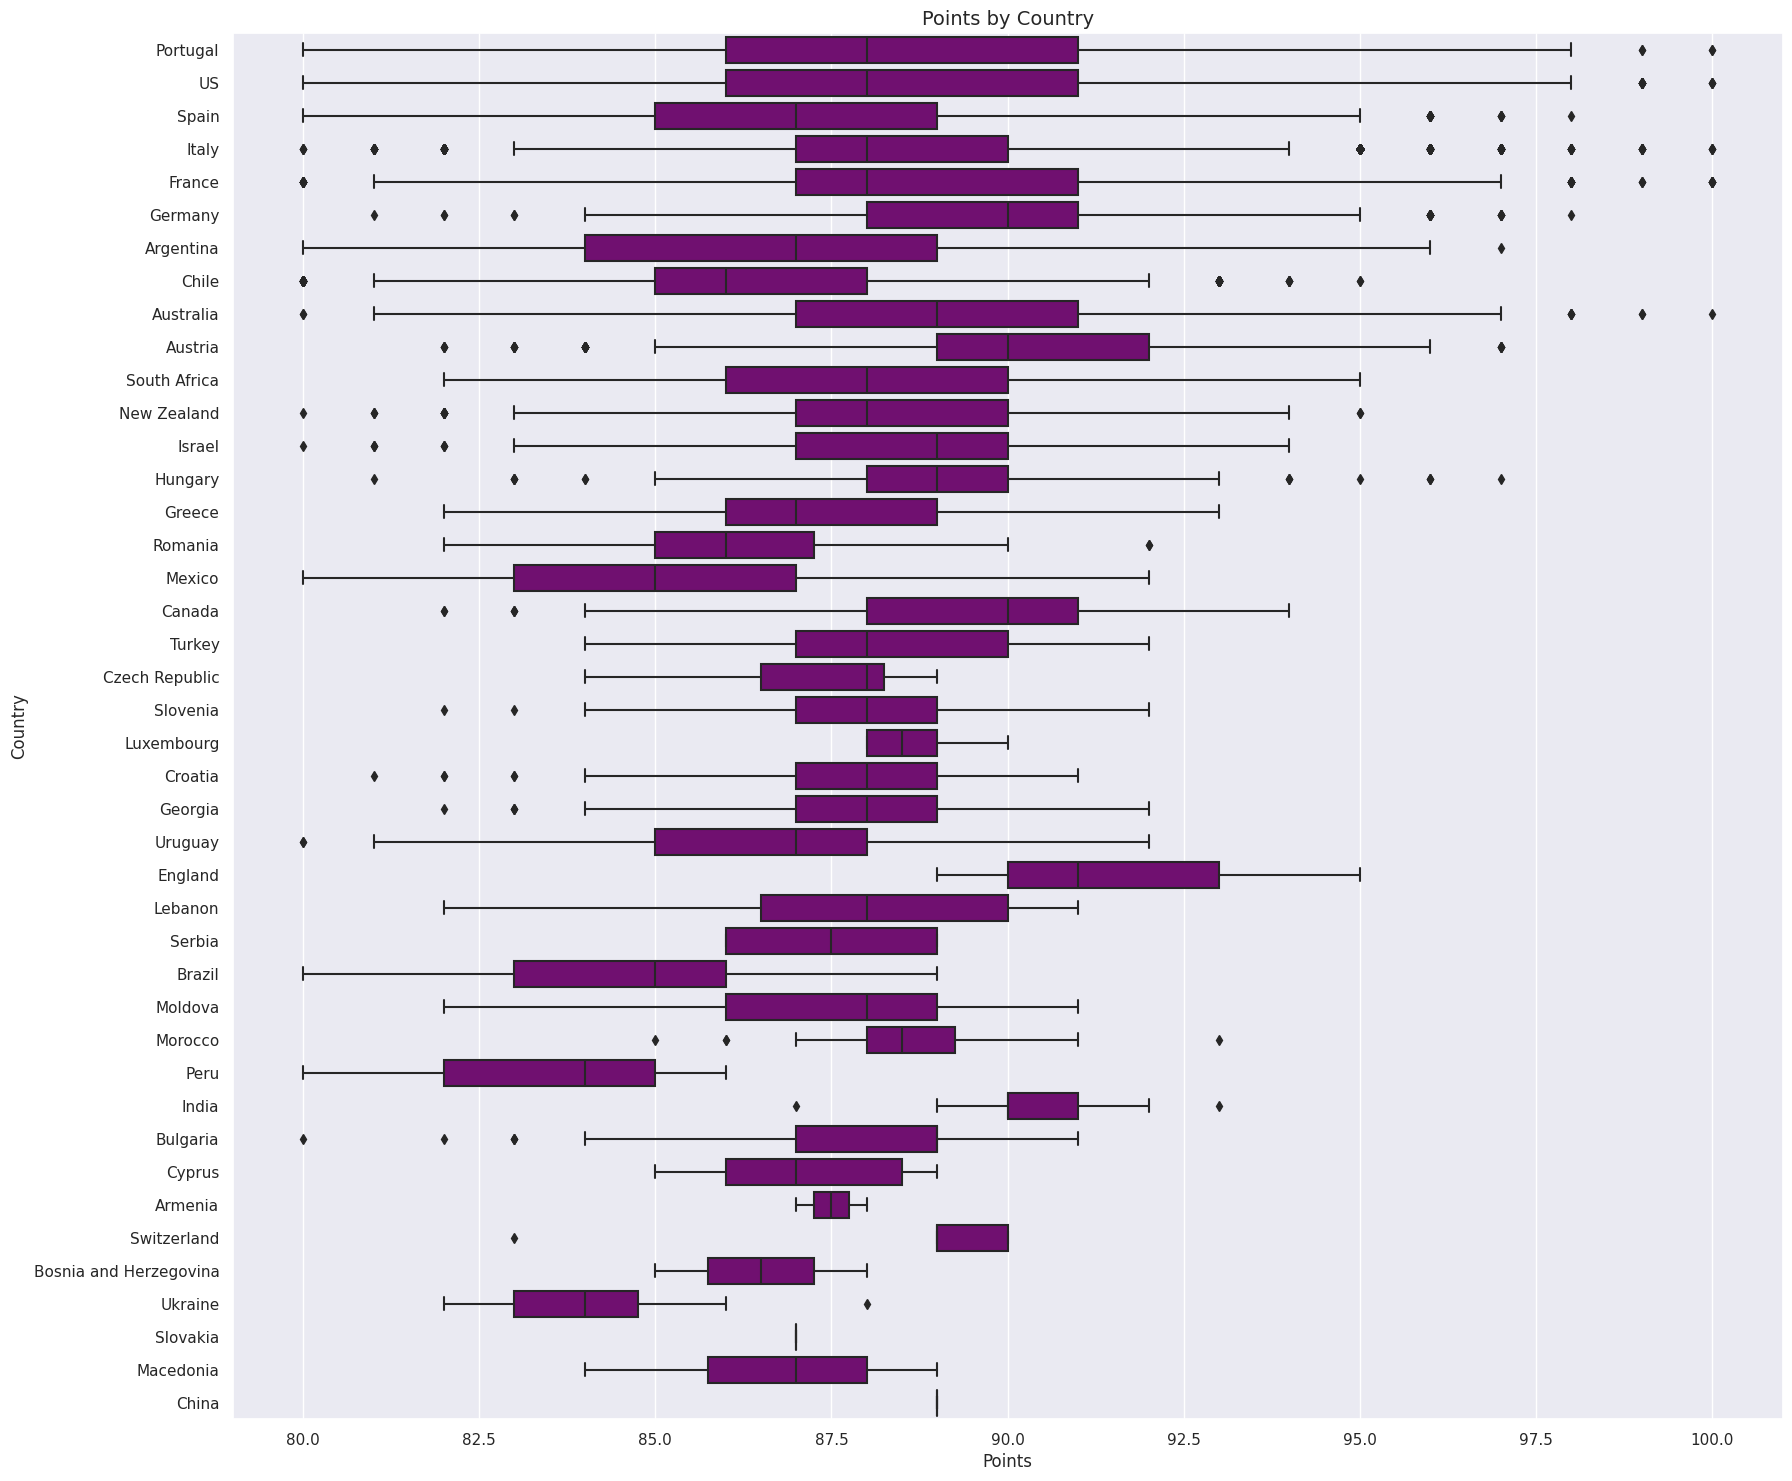

In [ ]:
plt.figure(figsize=(20, 18))
sns.boxplot(data=df1, x='points', y='country', color = 'Purple')
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

<ipython-input-49-8c661f603d38>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_price = df1.groupby("country").agg("mean")


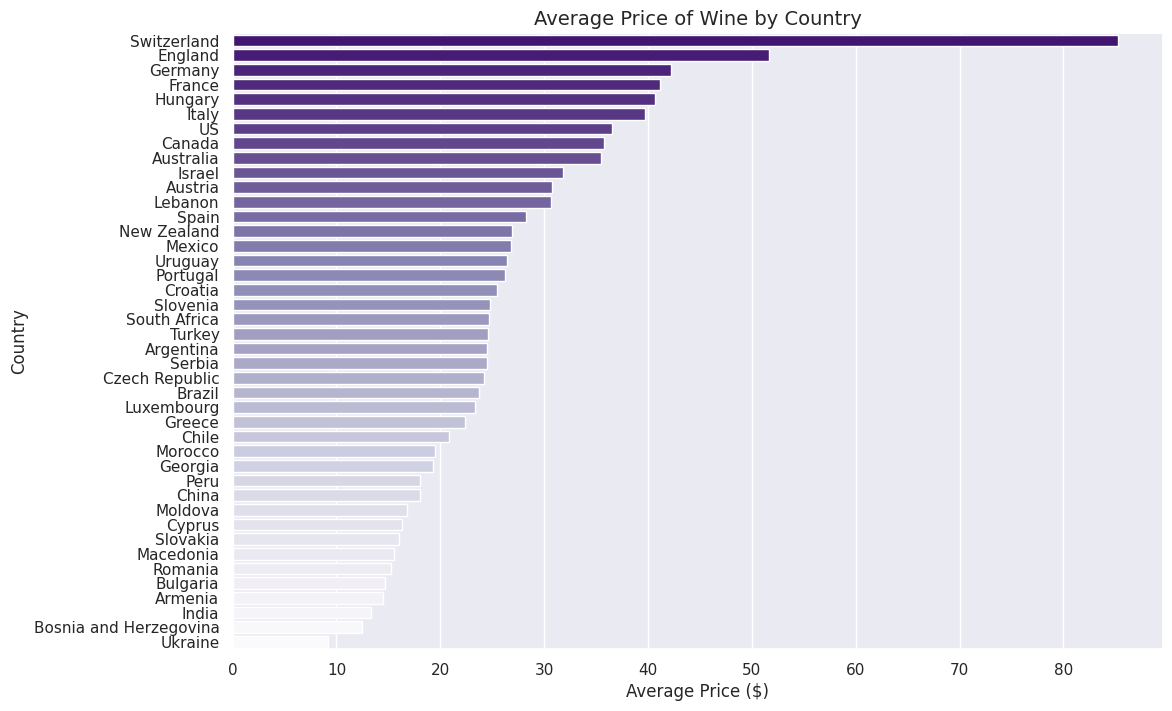

In [ ]:
# Now that we've seen the different distribution of quality of wine from each country,
# let's investigate the price of wine from other countries.

average_price = df1.groupby("country").agg("mean")
average_price = average_price.sort_values(by="price", ascending=False)
y = average_price.index.to_series()
x = average_price["price"]

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Average Price of Wine by Country', fontsize = 14)
plt.xlabel('Average Price ($)')
plt.ylabel('Country');

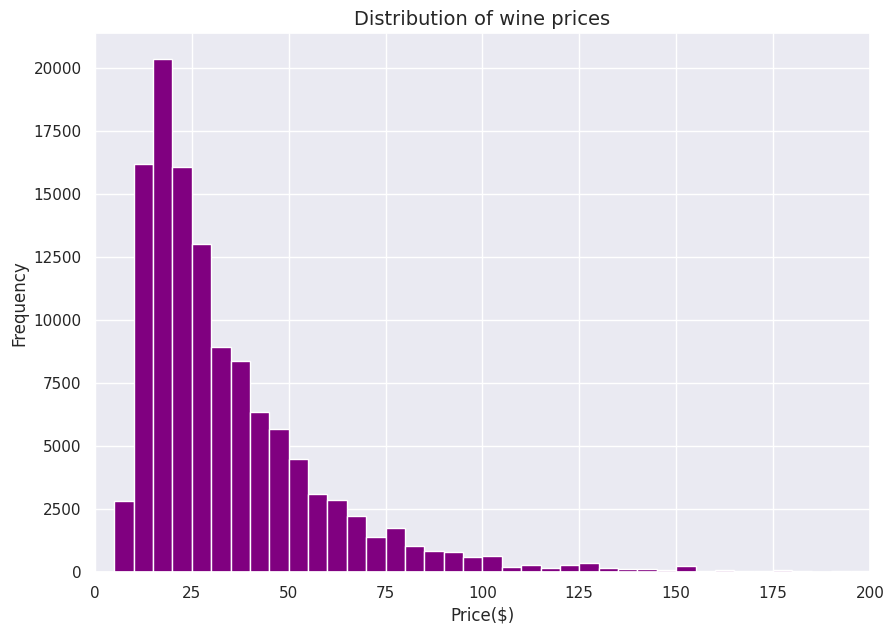

In [ ]:
# first look at the distribution of wine prices
plt.figure(figsize=(10, 7))
bins = np.arange (0, df1["price"].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color = 'Purple')
plt.xlim(0,200)
plt.title('Distribution of wine prices', fontsize=14)
plt.xlabel('Price($)')
plt.ylabel('Frequency');

In [ ]:
df1["price"].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [ ]:
np.log10(df1["price"].describe())


count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

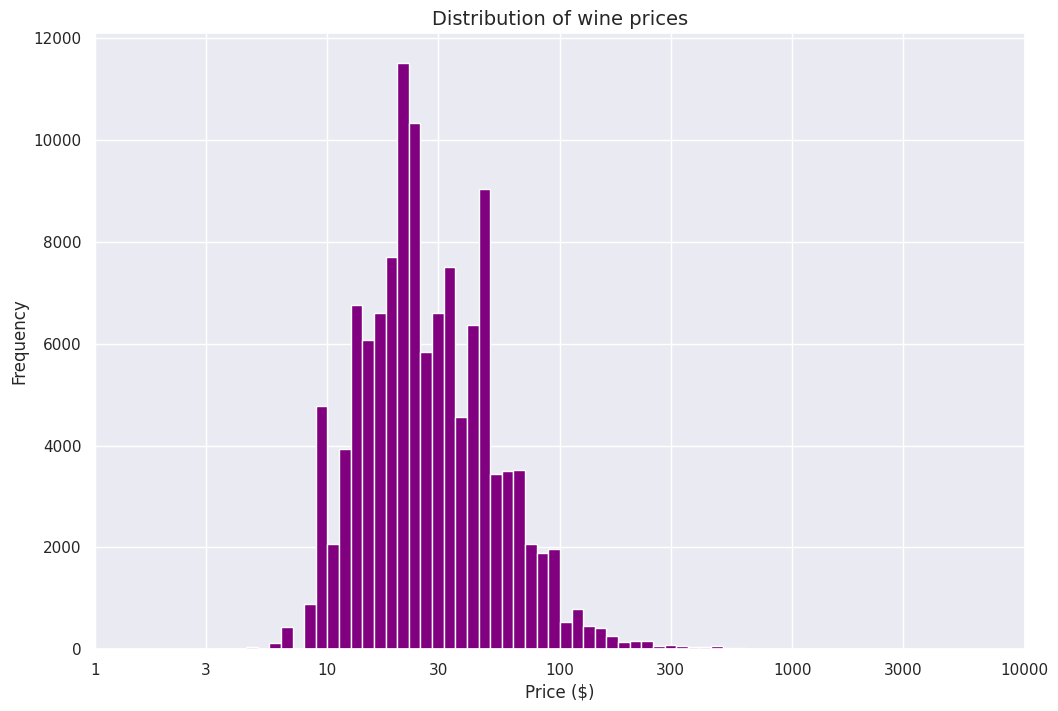

In [ ]:
# price distribution on a log scale
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color='Purple')
plt.title('Distribution of wine prices', fontsize=14)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

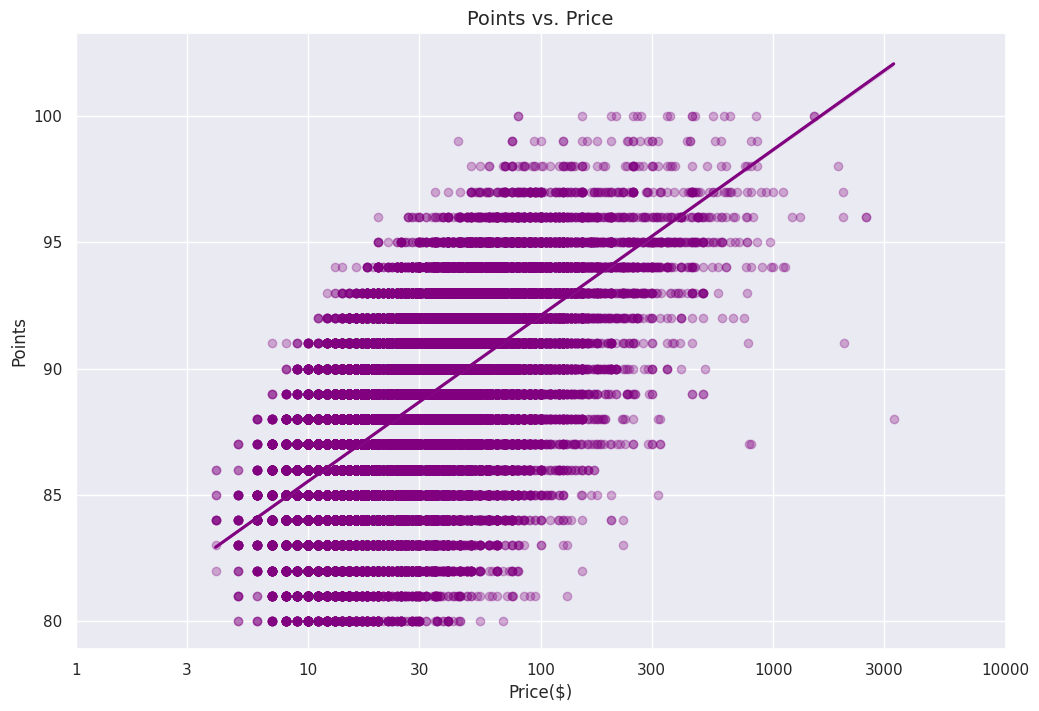

In [ ]:
# relationship between points and price
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color='Purple', logx=True, scatter_kws={'alpha':0.3})
plt.title("Points vs. Price", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Price($)")
plt.ylabel("Points");

In [ ]:
# the lowest priced wine
df1[df1["price"] == df1["price"].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [ ]:
# the highest priced wine
df1[df1["price"] == df1["price"].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


In [ ]:
df1["variety"].value_counts()[:20]

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: variety, dtype: int64

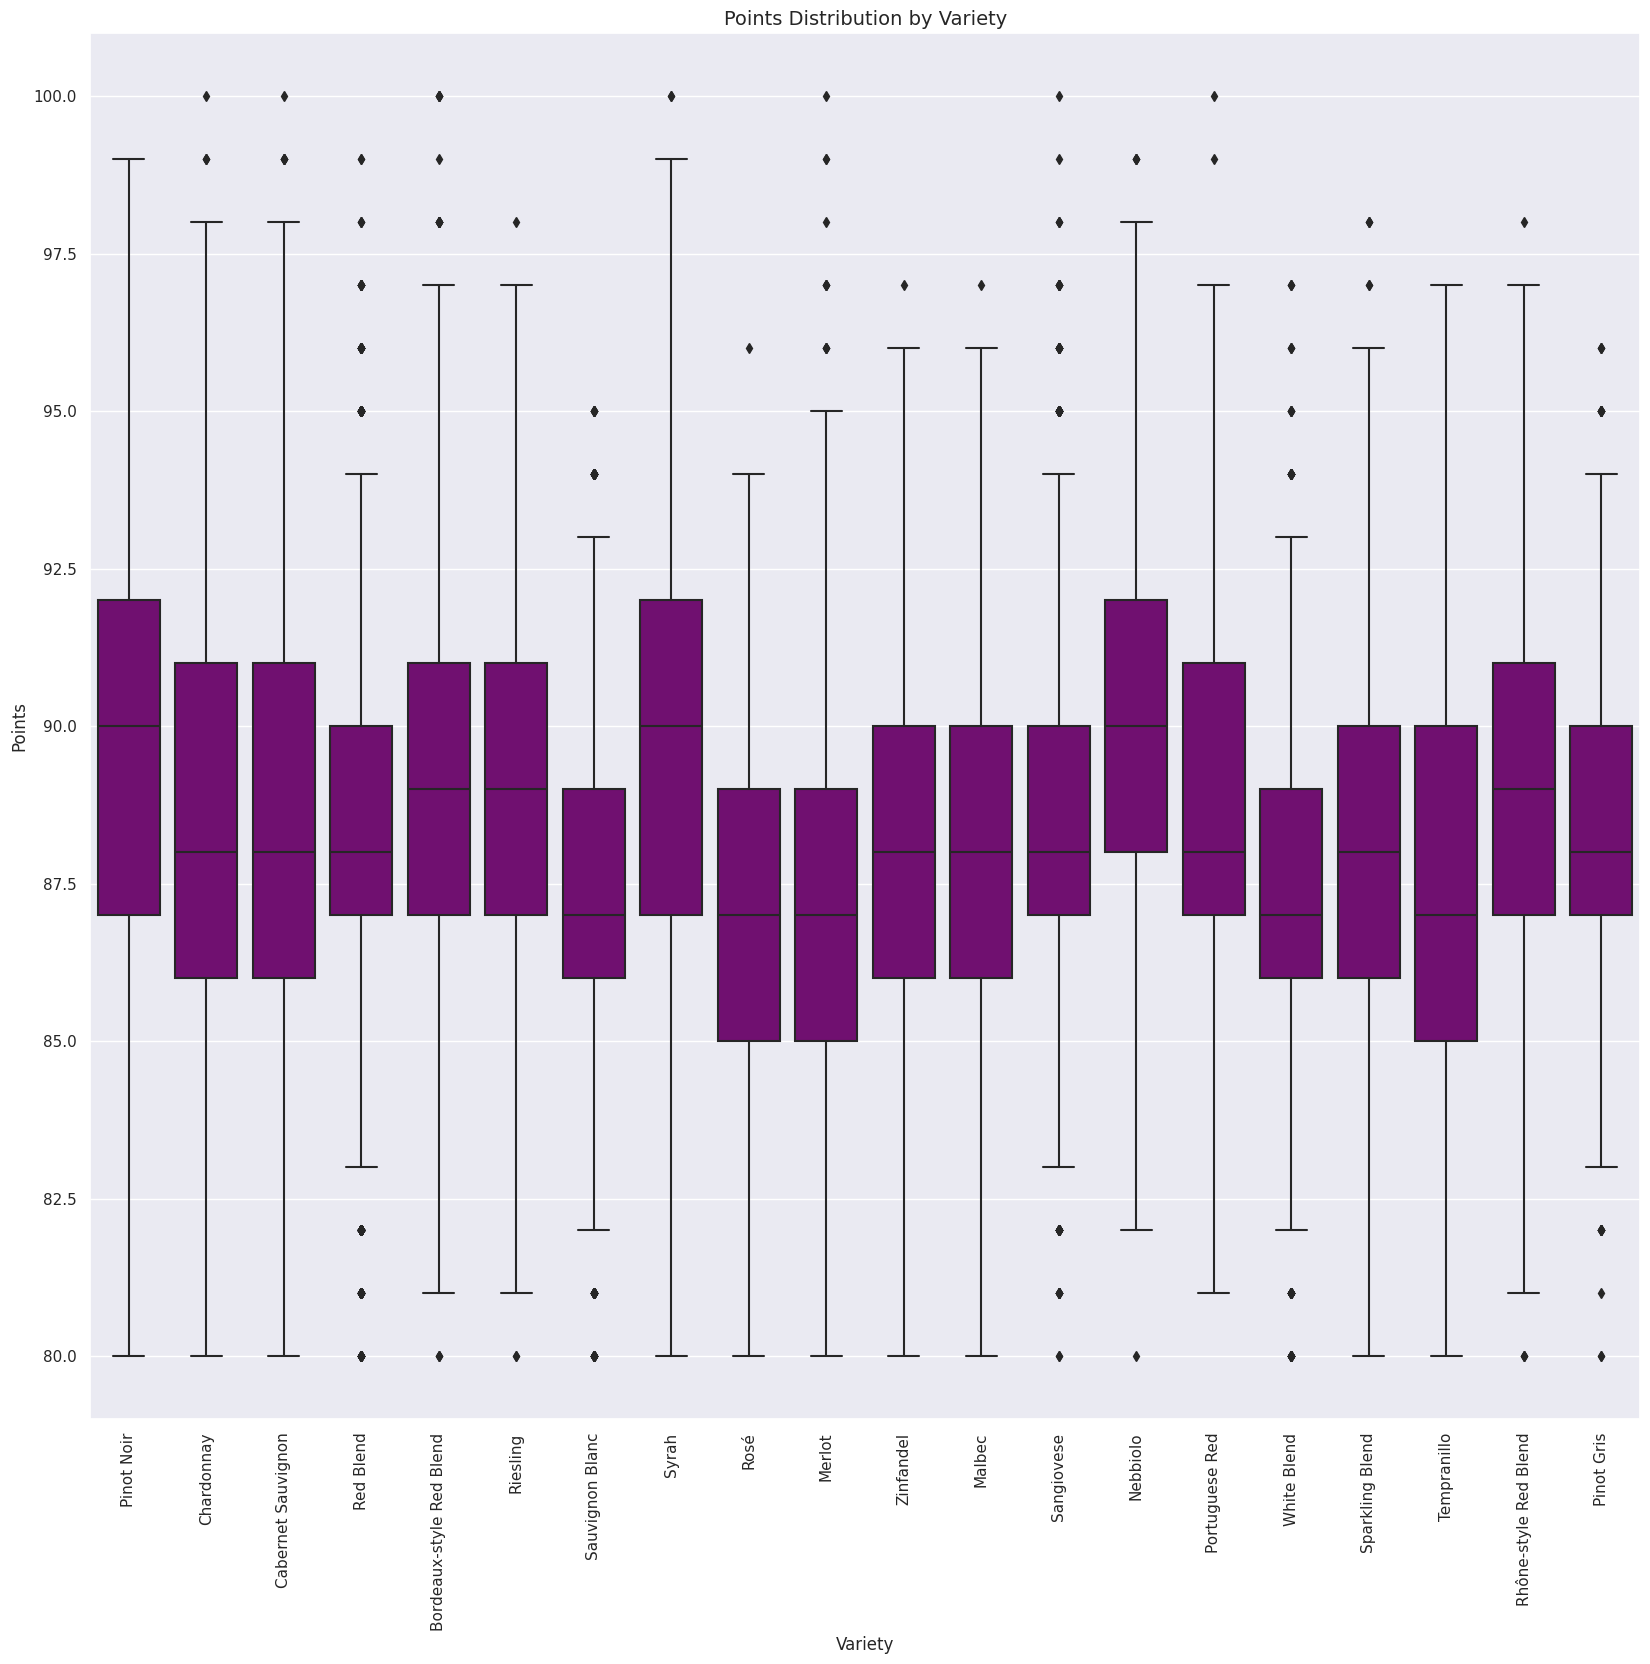

In [ ]:
# top 20 most frequent wines by points scored
plt.figure(figsize=(20, 18))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color="Purple",
            order=df1["variety"].value_counts().iloc[:20].index)

plt.title('Points Distribution by Variety', fontsize = 14)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=90);

In [ ]:
# top 10 under $15
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


In [ ]:
# top 10 between $15 and $30
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


In [ ]:
# top 10 above $50
above_50 = df1.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query("price > 50")
above_50 = above_50.sort_values(by="points", ascending=False)[:10]
above_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red
